Theoretical Questions


**1. What is a Decision Tree, and how does it work?**  
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values, forming a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome, and each leaf node represents a class label (classification) or continuous value (regression).

---

**2. What are impurity measures in Decision Trees?**  
Impurity measures quantify the disorder or uncertainty in a dataset. They help in selecting the best feature to split on at each node. Common impurity measures are **Gini Impurity** and **Entropy**.

---

**3. What is the mathematical formula for Gini Impurity?**  
\[
Gini = 1 - \sum_{i=1}^{n} p_i^2
\]  
where \(p_i\) is the probability of class \(i\) in a node.

---

**4. What is the mathematical formula for Entropy?**  
\[
Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
\]  
where \(p_i\) is the probability of class \(i\) in a node.

---

**5. What is Information Gain, and how is it used in Decision Trees?**  
Information Gain is the reduction in entropy or impurity after a dataset is split on an attribute. It is used to determine the best feature to split the data at each node in the tree.  
\[
Information\ Gain = Entropy(parent) - \sum_{i=1}^{k} \frac{n_i}{n} \times Entropy(child_i)
\]

---

**6. What is the difference between Gini Impurity and Entropy?**  
- **Gini Impurity** is simpler and faster to compute and focuses on misclassification.  
- **Entropy** involves logarithmic calculations and is based on information theory.  
Both aim to measure node impurity but may lead to slightly different splits.

---

**7. What is the mathematical explanation behind Decision Trees?**  
Decision Trees use a **greedy algorithm** that recursively partitions data based on feature values to minimize impurity. At each node, the feature and threshold that result in the highest **Information Gain** or lowest **Gini Impurity** are selected. The tree continues growing until stopping conditions (like depth or purity) are met.

---

**8. What is Pre-Pruning in Decision Trees?**  
Pre-Pruning (early stopping) prevents the tree from growing too large by stopping the split early based on predefined conditions like maximum depth, minimum samples per leaf, or minimum impurity decrease.

---

**9. What is Post-Pruning in Decision Trees?**  
Post-Pruning builds a full tree and then removes branches that do not contribute significantly to the model’s accuracy. This helps in reducing overfitting.

---

**10. What is the difference between Pre-Pruning and Post-Pruning?**  
- **Pre-Pruning** stops the tree from growing during training.  
- **Post-Pruning** allows the tree to grow fully, then prunes unnecessary branches.  
Pre-pruning is faster; post-pruning is often more accurate but computationally expensive.

---

**11. What is a Decision Tree Regressor?**  
A Decision Tree Regressor predicts continuous numerical values by splitting the dataset to minimize the variance within each split, rather than using class labels.

---

**12. What are the advantages and disadvantages of Decision Trees?**  
**Advantages:**  
- Easy to interpret and visualize  
- Handles both numerical and categorical data  
- No need for feature scaling  
**Disadvantages:**  
- Prone to overfitting  
- Can be unstable with small changes in data  
- Biased towards features with more levels

---

**13. How does a Decision Tree handle missing values?**  
Some Decision Tree implementations can handle missing values by using surrogate splits or ignoring missing values during split calculation. In practice, preprocessing like imputation is often used.

---

**14. How does a Decision Tree handle categorical features?**  
Categorical features can be handled by splitting based on each category or using encoding techniques (e.g., one-hot encoding). Some libraries like `scikit-learn` require categorical variables to be encoded numerically.

---

**15. What are some real-world applications of Decision Trees?**  
- Medical diagnosis  
- Credit risk assessment  
- Fraud detection  
- Customer segmentation  
- Loan approval systems  
- Marketing strategy planning

In [1]:
# Practical Questions

In [2]:
# 1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [3]:
# 2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature Importances:", clf_gini.feature_importances_)


Feature Importances: [0.         0.01911002 0.55727376 0.42361622]


In [4]:
# 3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 1.0


In [5]:
# 4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_train_h, y_train_h)
y_pred_h = regressor.predict(X_test_h)
print("MSE:", mean_squared_error(y_test_h, y_pred_h))


MSE: 0.531000084632768


In [6]:
# 5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

from sklearn.tree import export_graphviz
import graphviz

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format='png', cleanup=True)


'iris_tree.png'

In [7]:
# 6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree

clf_limited = DecisionTreeClassifier(max_depth=3)
clf_limited.fit(X_train, y_train)
y_pred_limited = clf_limited.predict(X_test)
print("Accuracy (Max Depth 3):", accuracy_score(y_test, y_pred_limited))

clf_full = DecisionTreeClassifier()
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
print("Accuracy (Full Tree):", accuracy_score(y_test, y_pred_full))


Accuracy (Max Depth 3): 1.0
Accuracy (Full Tree): 1.0


In [8]:
# 7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree

clf_split_5 = DecisionTreeClassifier(min_samples_split=5)
clf_split_5.fit(X_train, y_train)
y_pred_split_5 = clf_split_5.predict(X_test)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, y_pred_split_5))

clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
print("Accuracy (Default Tree):", accuracy_score(y_test, y_pred_default))


Accuracy (min_samples_split=5): 1.0
Accuracy (Default Tree): 1.0


In [9]:
# 8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, iris.target, test_size=0.3, random_state=42)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = clf_scaled.predict(X_test_s)
print("Accuracy (Scaled):", accuracy_score(y_test_s, y_pred_scaled))

clf_unscaled = DecisionTreeClassifier()
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
print("Accuracy (Unscaled):", accuracy_score(y_test, y_pred_unscaled))


Accuracy (Scaled): 1.0
Accuracy (Unscaled): 1.0


In [10]:
# 9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
print("Accuracy (OvR):", accuracy_score(y_test, y_pred_ovr))


Accuracy (OvR): 1.0


In [11]:
# 10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance}")


sepal length (cm): 0.038220038220038215
sepal width (cm): 0.0
petal length (cm): 0.06846677356655183
petal width (cm): 0.89331318821341


In [12]:
# 11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree

reg_limited = DecisionTreeRegressor(max_depth=5)
reg_limited.fit(X_train_h, y_train_h)
y_pred_limited = reg_limited.predict(X_test_h)
print("MSE (max_depth=5):", mean_squared_error(y_test_h, y_pred_limited))

reg_unlimited = DecisionTreeRegressor()
reg_unlimited.fit(X_train_h, y_train_h)
y_pred_unlimited = reg_unlimited.predict(X_test_h)
print("MSE (Unrestricted):", mean_squared_error(y_test_h, y_pred_unlimited))


MSE (max_depth=5): 0.5210801561811792
MSE (Unrestricted): 0.5331817450042958


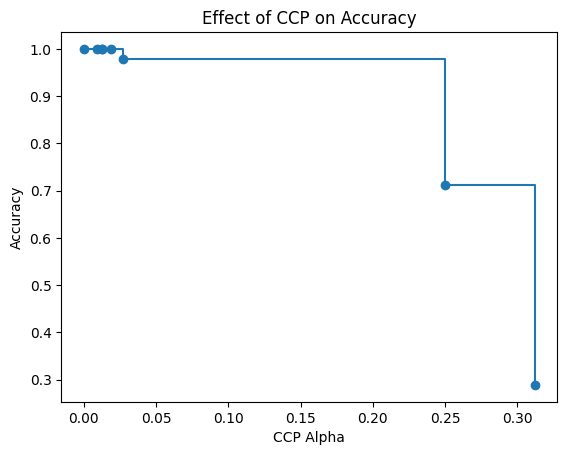

In [13]:
# 12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

accuracies = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    acc = clf_pruned.score(X_test, y_test)
    accuracies.append(acc)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(ccp_alphas, accuracies, marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of CCP on Accuracy")
plt.show()


In [14]:
# 13. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


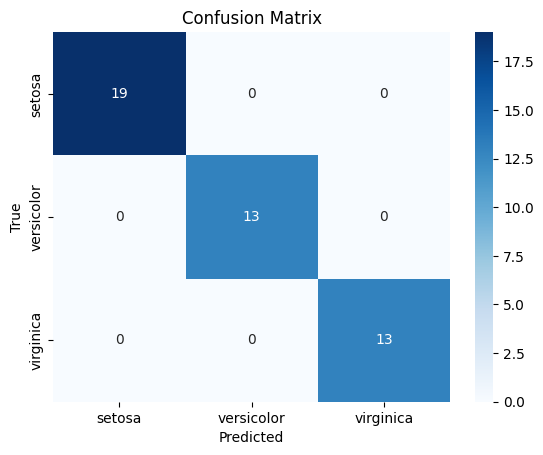

In [15]:
# 14. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [16]:
# 15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best Score: 0.9428571428571428
